In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
import pprint

In [2]:
df = pd.read_csv('AgriMarket.csv')

In [3]:
df

,YMD,YM,MD,Product,Price,환율(원/US$),콜금리(연%),item_PPI,item_CPI,Food Price Index,Cereals
0,20050103,200501,103,감자,6323.101449,1013.00,3.33,71.15,69.162,65.4,60.5
1,20050103,200501,103,고구마,4291.111111,1013.00,3.33,53.12,41.811,65.4,60.5
2,20050103,200501,103,깻잎,4534.333333,1013.00,3.33,NaN,53.348,65.4,60.5
3,20050103,200501,103,마늘,20785.714286,1013.00,3.33,49.58,58.270,65.4,60.5
4,20050104,200501,104,감자,6233.314286,1013.00,3.33,71.15,69.162,65.4,60.5
...,...,...,...,...,...,...,...,...,...,...,...
15875,20201230,202012,1230,마늘,53533.333333,1180.05,0.70,102.04,118.170,108.6,116.4
15876,20201231,202012,1231,감자,5094.163934,1180.05,0.70,107.24,102.430,108.6,116.4
15877,20201231,202012,1231,고구마,10700.294118,1180.05,0.70,137.90,96.130,108.6,116.4
15878,20201231,202012,1231,깻잎,7598.166667,1180.05,0.70,NaN,87.660,108.6,116.4


# 마늘

In [4]:
garlic = df.loc[df['Product']=='마늘', ['YMD', 'Price']]
garlic['YM'] = garlic['YMD'].map(lambda x:str(x)[:6])
garlic = garlic.drop('YMD', axis=1)
garlic = pd.DataFrame(garlic.groupby('YM')['Price'].mean())
garlic = garlic.reset_index()

train_idx = round(len(garlic)*0.8)
test_idx = len(garlic)-train_idx
train = garlic[:train_idx]
test = garlic[train_idx:]
test_len = test_idx

In [5]:
SARIMA_model = pm.auto_arima(train["Price"], start_p=1, start_q=1,
                         test='pp',
                         max_p=5, max_q=5, 
                         m=12,
                         start_P=0, 
                         stationary=True,
                         seasonal=True,
                         d=None, 
                         D=1,
                         max_P=5, 
                         max_Q=5, 
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

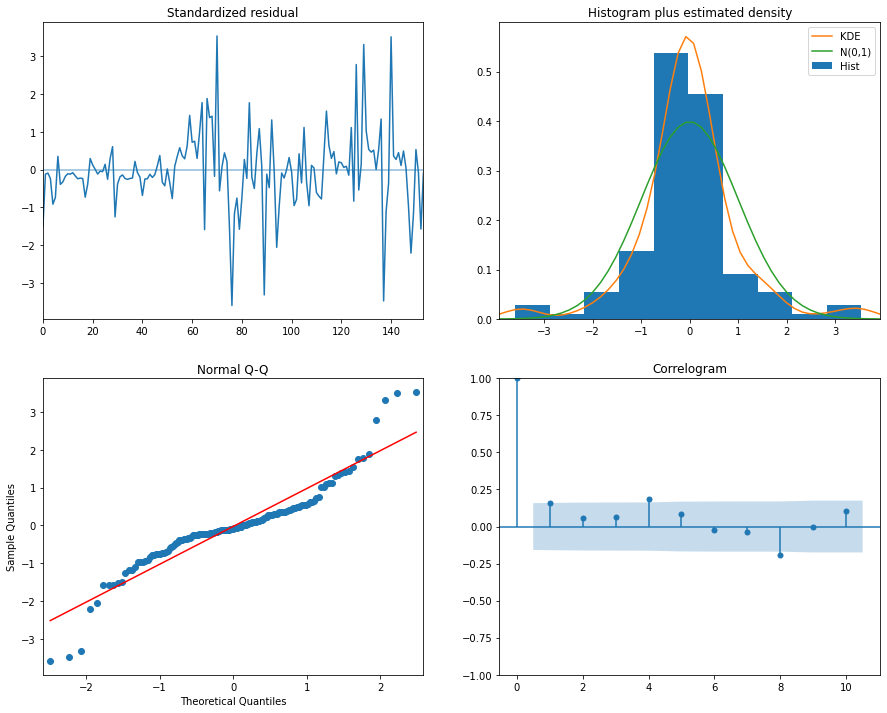

In [6]:
SARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

In [7]:
def forecast(model, periods=test_len):
    # Forecast
    n_periods = periods
    y_predict = model.predict(n_periods=n_periods)

    y_pred = pd.Series(y_predict)

    plt.figure(figsize=(15,7))
    plt.plot(train["Price"], color='b', label='real')
    plt.plot(y_pred, color='g', label='y_pred')
    plt.plot(test['Price'], color='r', label='y_true')
    
    plt.title("Forecast of Price")
    plt.legend()
    plt.show()
    
    y_true = test['Price']
    
    mape = np.mean(np.abs(y_pred - y_true) / np.abs(y_true))
    mae = np.mean(np.abs(y_pred - y_true))
    mpe = np.mean((y_pred-y_true)/y_true)
    rmse = np.mean((y_pred - y_true)**2)**.5


    pprint.pprint({'mape':mape, 'mae':mae,
           'mpe':mpe, 'rmse':rmse})

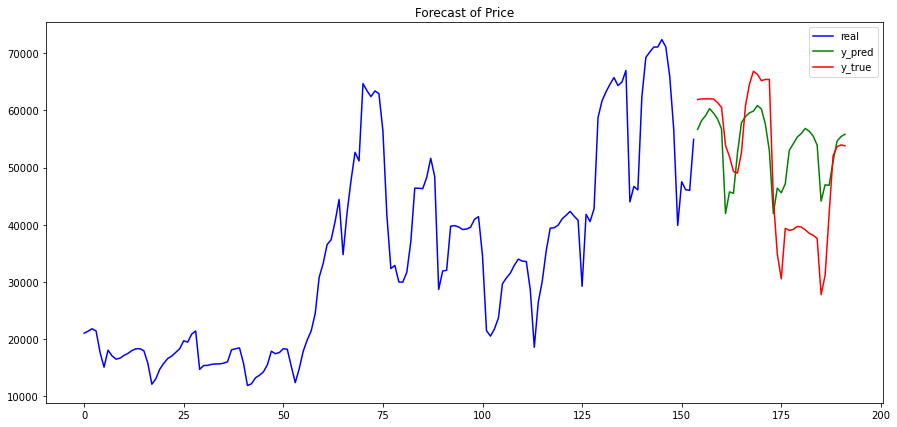

{'mae': 8095.907248925243,
 'mape': 0.19445279878631427,
 'mpe': 0.11322091103050562,
 'rmse': 9962.238925946192}


In [8]:
forecast(SARIMA_model)

# 감자

In [9]:
potato = df.loc[df['Product']=='감자', ['YMD', 'Price']]
potato['YM'] = potato['YMD'].map(lambda x:str(x)[:6])
potato = potato.drop('YMD', axis=1)
potato = pd.DataFrame(potato.groupby('YM')['Price'].mean())
potato = potato.reset_index()

train = potato[:train_idx]
test = potato[train_idx:]

In [10]:
SARIMA_model2 = pm.auto_arima(train["Price"], start_p=1, start_q=1,
                         test='pp',
                         max_p=5, max_q=5, 
                         m=12, 
                         start_P=0, 
                         stationary=True,
                         seasonal=True,
                         d=None, 
                         D=1, 
                         max_P=5, 
                         max_Q=5, 
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

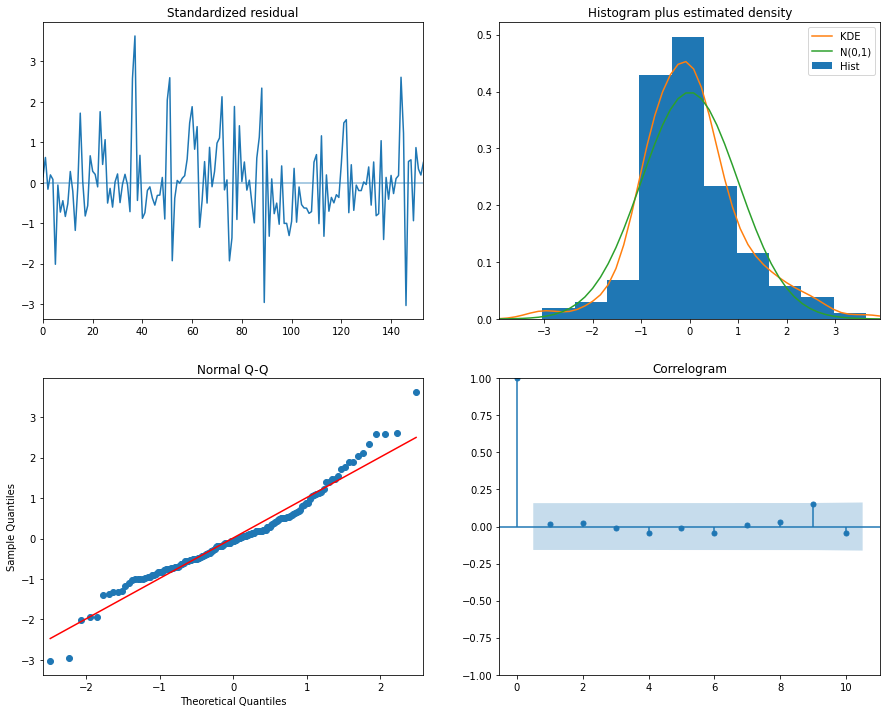

In [11]:
SARIMA_model2.plot_diagnostics(figsize=(15,12))
plt.show()

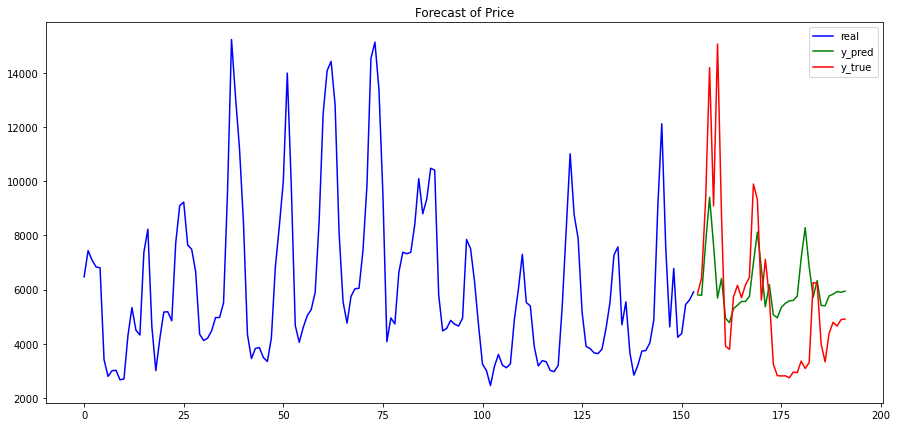

{'mae': 1900.2617374060712,
 'mape': 0.4164525663493186,
 'mpe': 0.26653299809764125,
 'rmse': 2570.316262798808}


In [12]:
forecast(SARIMA_model2)

# 고구마

In [13]:
sweetpotato = df.loc[df['Product']=='고구마', ['YMD', 'Price']]
sweetpotato['YM'] = sweetpotato['YMD'].map(lambda x:str(x)[:6])
sweetpotato = sweetpotato.drop('YMD', axis=1)
sweetpotato = pd.DataFrame(sweetpotato.groupby('YM')['Price'].mean())
sweetpotato = sweetpotato.reset_index()

train = sweetpotato[:train_idx]
test = sweetpotato[train_idx:]

In [14]:
SARIMA_model3 = pm.auto_arima(train["Price"], start_p=1, start_q=1,
                         test='pp',
                         max_p=5, max_q=5, 
                         m=12, 
                         start_P=0, 
                         stationary=True,
                         seasonal=True,
                         d=None, 
                         D=1, 
                         max_P=5, 
                         max_Q=5, 
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

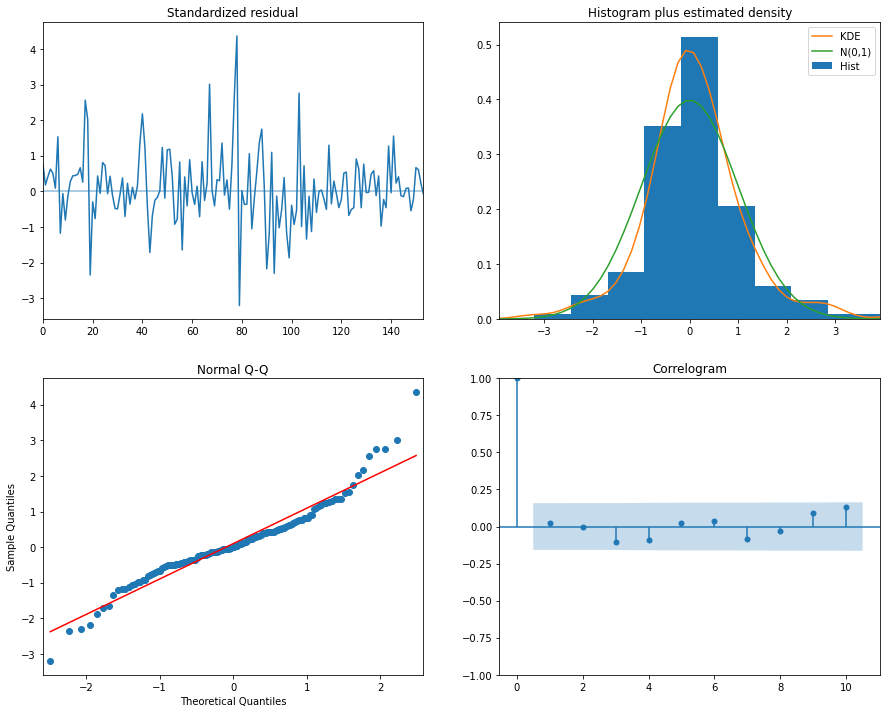

In [15]:
SARIMA_model3.plot_diagnostics(figsize=(15,12))
plt.show()

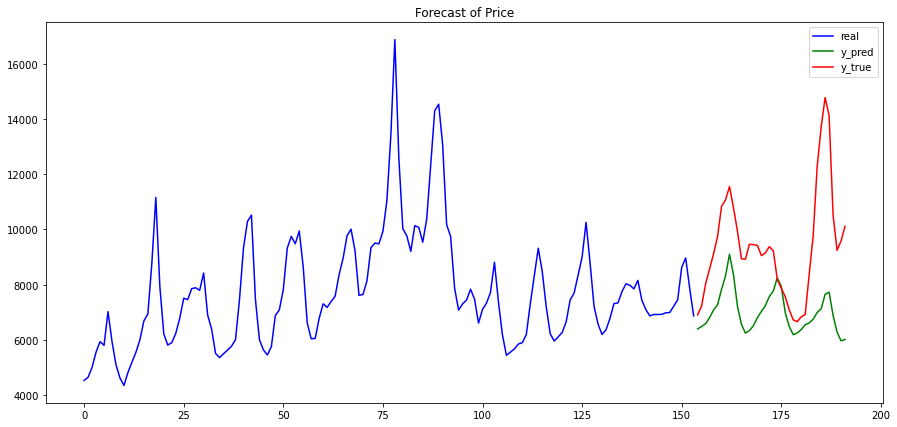

{'mae': 2387.1393419138058,
 'mape': 0.2312508762940945,
 'mpe': -0.2304406677391293,
 'rmse': 2951.4302203477687}


In [16]:
forecast(SARIMA_model3)

# 깻잎

In [17]:
perilla = df.loc[df['Product']=='깻잎', ['YMD', 'Price']]
perilla['YM'] = perilla['YMD'].map(lambda x:str(x)[:6])
perilla = perilla.drop('YMD', axis=1)
perilla = pd.DataFrame(perilla.groupby('YM')['Price'].mean())
perilla = perilla.reset_index()

train = perilla[:train_idx]
test = perilla[train_idx:]

In [18]:
SARIMA_model4 = pm.auto_arima(train["Price"], start_p=1, start_q=1,
                         test='pp',
                         max_p=5, max_q=5, 
                         m=12, 
                         start_P=0, 
                         stationary=True,
                         seasonal=True,
                         d=None, 
                         D=1, 
                         max_P=5, 
                         max_Q=5, 
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

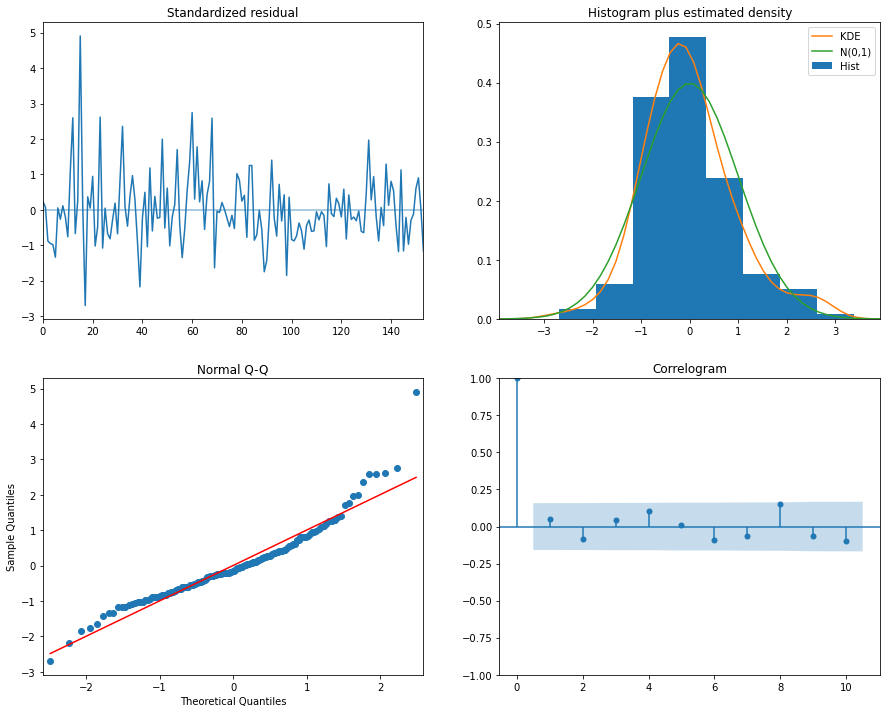

In [19]:
SARIMA_model4.plot_diagnostics(figsize=(15,12))
plt.show()

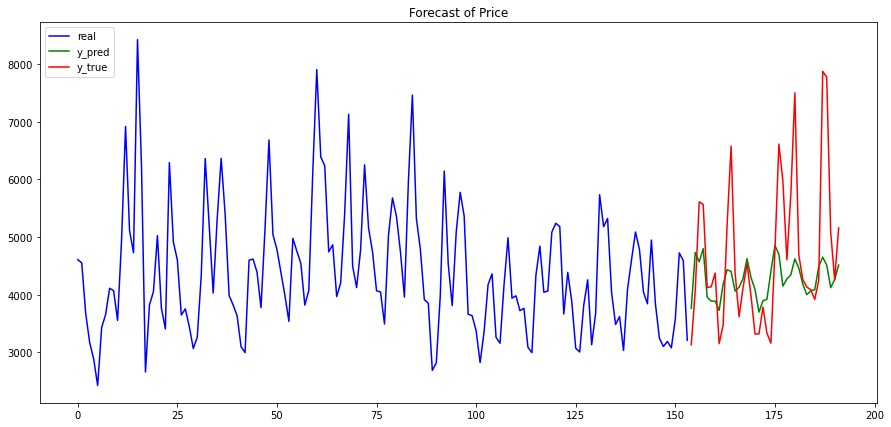

{'mae': 794.3844883778501,
 'mape': 0.15101397535850974,
 'mpe': -0.040220696098434816,
 'rmse': 1172.2980289920142}


In [20]:
forecast(SARIMA_model4)